Dramane Aziz | Finance Addict

---


# ANALYSE DES DONNEES BOURSIERES DE LA BRVM 

|  |  |
|:---|:---|
|**Temps de Lecture** |  60 minutes |
|**Outils utilisés** | Python, Algèbre,Statistique|
|**Mots clés** | BRVM,Finance,Rendement,Risque, Portefeuille|

---

La BRVM (Bourse Régionale des Valeurs Mobilières) est la bourse commune aux huit pays de l’UEMOA (Côte d’Ivoire, Sénégal, Burkina Faso, Mali, Bénin, Togo, Niger et Guinée-Bissau). Basée à Abidjan, elle permet la cotation et les échanges d’actions et d’obligations des entreprises et des États de la région. C’est la seule bourse au monde partagée par plusieurs pays, et elle joue un rôle central dans le financement des économies ouest-africaines en reliant l’épargne des investisseurs aux besoins de financement des acteurs publics et privés. Elle a une importance cruciale dans nos économies. Comprendre les données des entreprises cotées à la BRVM est essentiel, non seulement pour les investisseurs afin d’orienter leurs décisions, mais aussi pour les entreprises elles-mêmes afin d’atteindre leurs objectifs.

### Importer les Librairies requises pour l'analyse des données.

In [147]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import date
import os

pd.options.display.float_format = "{:,.2f}".format

## **1. Charger les données de la CIE , FILTISAC ainsi CFAO-CI**


In [12]:
#importer les données de la CIE et garder juste la prix de cloture
CIE= pd.read_csv("Downloads/Project Worldquant/Data/CIEC - Données Historiques.csv")
#Garder juste les deux premières colonnes 
CIE= CIE[["Date","Dernier"]]
#Renommer les colonnes
CIE.columns =["Date","CIE"]
#Reformater la date
CIE.Date= pd.to_datetime(CIE['Date'],dayfirst=True)
CIE.head()

,Date,CIE
0,2025-09-19,2.38
1,2025-09-18,2.40
2,2025-09-17,2.40
3,2025-09-16,2.40
4,2025-09-15,2.40


In [13]:
#importer les données de Filtisac
FTSC= pd.read_csv("Downloads/Project Worldquant/Data/FTSC - Données Historiques.csv")
#Garder juste les deux premières colonnes 
FTSC= FTSC[["Date","Dernier"]]
#Renommer les colonnes
FTSC.columns =["Date","FTSC"]
#Reformater la date
FTSC.Date= pd.to_datetime(FTSC['Date'],dayfirst=True)
FTSC.head()

,Date,FTSC
0,2025-09-19,4.60
1,2025-09-18,4.63
2,2025-09-17,4.61
3,2025-09-16,4.60
4,2025-09-15,4.76


In [14]:
#importer les données de CFAO CI
CFAC= pd.read_csv("Downloads/Project Worldquant/Data/CFAC - Données Historiques.csv")
#Garder juste les deux premières colonnes 
CFAC= CFAC[["Date","Dernier"]]
#Renommer les colonnes
CFAC.columns =["Date","CFAC"]
#Reformater la date
CFAC.Date= pd.to_datetime(CFAC['Date'],dayfirst=True)
CFAC.head()

,Date,CFAC
0,2025-09-19,955.00
1,2025-09-18,940.00
2,2025-09-17,940.00
3,2025-09-16,950.00
4,2025-09-15,945.00


## **2. Joindre les données de la CIE , FILTISAC ainsi CFAO-CI**


In [16]:
BRVM=CIE.merge(CFAC, how='left', on='Date').merge(FTSC,how='left',on='Date')
BRVM=BRVM.set_index((BRVM['Date']))
BRVM=BRVM[["CIE","CFAC","FTSC"]]
BRVM.head()

,CIE,CFAC,FTSC
Date,,,
2025-09-19,2.38,955.00,4.60
2025-09-18,2.40,940.00,4.63
2025-09-17,2.40,940.00,4.61
2025-09-16,2.40,950.00,4.60
2025-09-15,2.40,945.00,4.76


In [17]:
#Attribuer les vrais prix 
BRVM[["CIE","FTSC"]]=BRVM[["CIE","FTSC"]]*1000
#Print
BRVM

,CIE,CFAC,FTSC
Date,,,
2025-09-19,"2,385.00",955.00,"4,600.00"
2025-09-18,"2,395.00",940.00,"4,635.00"
2025-09-17,"2,395.00",940.00,"4,610.00"
2025-09-16,"2,395.00",950.00,"4,600.00"
2025-09-15,"2,395.00",945.00,"4,760.00"
...,...,...,...
2021-01-08,"1,300.00",360.00,"1,450.00"
2021-01-07,"1,345.00",360.00,"1,450.00"
2021-01-06,"1,375.00",360.00,"1,485.00"


## **3. Resume statistique données de la CIE , FILTISAC ainsi CFAO-CI**


Nos Stastiques descriptivent nous montrent Premièrement que nous avons des données manquantes au niveau de FILTISAC et CFAO-CI. En ce qui
concerne la valeur de ses actifs nous pouvons observer que la CIE a un prix moyen plus élévé que celui des deux autres entreprises ,cependant
le prix brut n'est pas un outils adéquat pour l'analyse de nos diffrents actifs. Ainsi nous utiliserons leur rendements afin de les comparer dans 
la suite de notre analyse.

In [20]:
BRVM.describe()

,CIE,CFAC,FTSC
count,"1,172.00","1,149.00","1,148.00"
mean,"2,022.39",638.91,"1,845.95"
std,284.30,277.92,970.76
min,"1,300.00",1.00,"1,075.00"
25%,"1,883.75",600.00,"1,300.00"
50%,"2,050.00",700.00,"1,520.00"
75%,"2,200.00",840.00,"1,906.25"
max,"2,800.00",970.00,"6,515.00"


## **3. Visualisation des données de la CIE , FILTISAC ainsi CFAO-CI**


In [22]:
BRVM[BRVM.index[0]: BRVM.index[670]]

,CIE,CFAC,FTSC
Date,,,
2025-09-19,"2,385.00",955.00,"4,600.00"
2025-09-18,"2,395.00",940.00,"4,635.00"
2025-09-17,"2,395.00",940.00,"4,610.00"
2025-09-16,"2,395.00",950.00,"4,600.00"
2025-09-15,"2,395.00",945.00,"4,760.00"
...,...,...,...
2023-01-10,"1,900.00",850.00,"1,300.00"
2023-01-09,"1,900.00",915.00,NaN
2023-01-06,"1,985.00",920.00,"1,390.00"


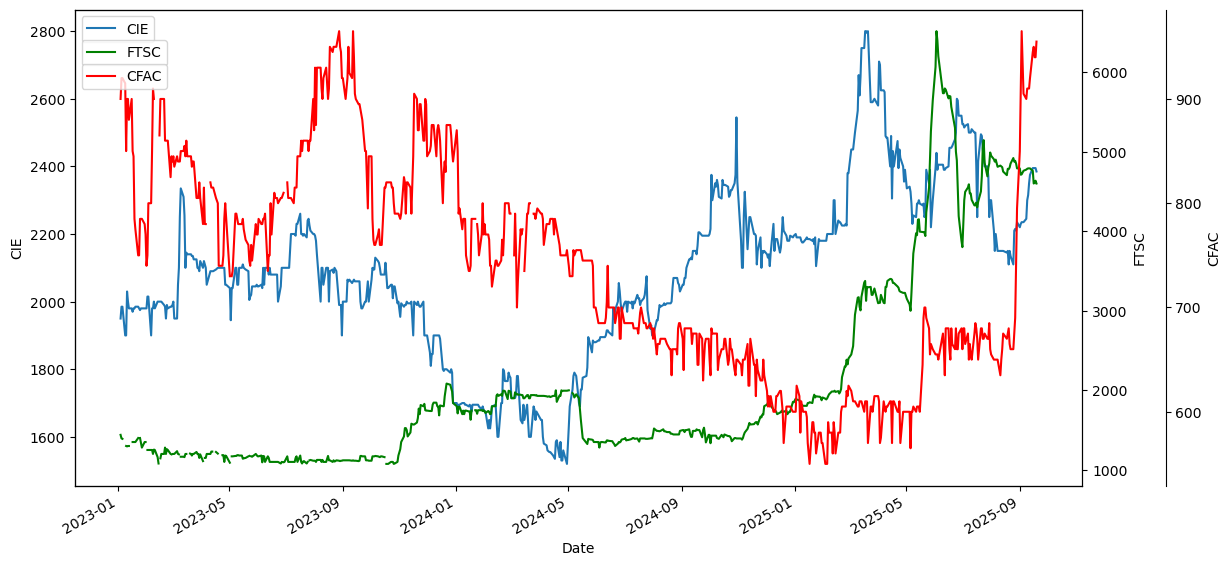

In [31]:

fig = plt.figure(figsize=(13,7))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax3 = ax1.twinx()

#Données des 3 dernières années
BRVM[BRVM.index[0]: BRVM.index[670]].plot(ax=ax1, y='CIE', legend=True)
BRVM[BRVM.index[0]: BRVM.index[670]].plot(ax=ax2, y='FTSC', legend=True, color='g')
BRVM[BRVM.index[0]: BRVM.index[670]].plot(ax=ax3, y='CFAC', legend=True, color='r')

# We set the labels to the axes
ax1.set_ylabel('CIE')
ax2.set_ylabel('FTSC')
ax3.set_ylabel('CFAC')
ax3.spines['right'].set_position(('outward', 60))

# Set position of legends
ax1.legend(['CIE'], loc='upper left')
ax2.legend(['FTSC'], loc='upper left', bbox_to_anchor=(0, 0.95))
ax3.legend(['CFAC'], loc='upper left', bbox_to_anchor=(0, 0.9))

plt.show()

## **3. Analyse des rendements**


Comme l'indique le graphique ci-dessus , il n'est pas aisé de comparer les actions de nos 3 entreprises en se basant juste sur le prix.
Cela est dû au fait que les prix ne sont pas à la même échelle ainsi pour palier à ce problème nous allons utiliser les rendements.
Supposons que Mr Kouamé décide d'investir le **1 Janvier 2021**,  **100 000 XOF** dans chacunes des actions énumérés ci -dessus grâce aux récommendations de son ami Moussa. **2 ans**  après il décide de vérifier combien a t-il pu dégager au cours de son investissement.

In [51]:
BRVM.iloc[-1]

CIE    1,450.00
CFAC     375.00
FTSC   1,605.00
Name: 2021-01-04 00:00:00, dtype: float64

In [55]:
# Prix initial
first_row = BRVM.iloc[-1]

# Assign price values to variables
cie_prix_i = first_row["CIE"]
ftsc_prix_i = first_row["FTSC"]
cfac_prix_i = first_row["CFAC"]

# Afficher les valeurs
print("Prix d'achat CIE :", np.round(cie_prix_i, 3))
print("Prix d'achat FILTISAC:", np.round(ftsc_prix_i , 3))
print("Prix d'achat CFAO-CI:", np.round(cfac_prix_i, 3))
print(" - - - - - - - - - -")

# Determiner le nombre de part achetable
part_cie = 100000 / cie_prix_i
part_ftsc= 100000 / ftsc_prix_i
part_cfac= 100000 / cfac_prix_i

# afficher le nombre pour chaque entreprise
print("Nombre de part de la CIE:", np.round(part_cie, 3))
print("Nombre de part de FTSC:", np.round(part_ftsc, 3))
print("Nombre de part de CFAC:", np.round(part_cfac, 3))


Prix d'achat CIE : 1450.0
Prix d'achat FILTISAC: 1605.0
Prix d'achat CFAO-CI: 375.0
 - - - - - - - - - -
Nombre de part de la CIE: 68.966
Nombre de part de FTSC: 62.305
Nombre de part de CFAC: 266.667


In [59]:
# Prix Final
first_row = BRVM.iloc[0]

# Assign price values to variables
cie_prix_f = first_row["CIE"]
ftsc_prix_f = first_row["FTSC"]
cfac_prix_f = first_row["CFAC"]

# Afficher les valeurs
print("Prix de revient CIE :", np.round(cie_prix_f, 3))
print("Prix de revient FILTISAC:", np.round(ftsc_prix_f , 3))
print("Prix de revient CFAO-CI:", np.round(cfac_prix_f, 3))
print(" - - - - - - - - - -")

# Valeur générée par chaque entreprise
cie_valeur = cie_prix_f * part_cie 
ftsc_valeur = ftsc_prix_f * part_ftsc
cfac_valeur = cfac_prix_f * part_cfac

# Print end date values
print("Valeur générée par CIE:", np.round(cie_valeur, 3))
print("Valeur générée par FTSC::", np.round(ftsc_valeur, 3))
print("Valeur générée par CFAC:", np.round(cfac_valeur, 3))




Prix de revient CIE : 2385.0
Prix de revient FILTISAC: 4600.0
Prix de revient CFAO-CI: 955.0
 - - - - - - - - - -
Valeur générée par CIE: 164482.759
Valeur générée par FTSC:: 286604.361
Valeur générée par CFAC: 254666.667


Mr Kouamé a investi 100000 FCFA dans chacune des 3 actions. En se basant sur nos calculs précédent, il apparait que son investissement a eu des rendements différents en fonction de l'action acheté.

In [67]:
#Calcul du rendement simple en captital 
R_CIE= (cie_valeur- 100000)/100000
R_FTSC=(ftsc_valeur- 100000)/100000
R_CFAC=(cfac_valeur- 100000)/100000

# Print end date values
print("Rendement généré par CIE:", np.round(R_CIE, 3)*100,"%")
print("Rendement généré  par FTSC:", np.round(R_FTSC, 3)*100,"%")
print("Rendement généré  par CFAC:", np.round(R_CFAC, 3)*100,"%")



Rendement généré par CIE: 64.5 %
Rendement généré  par FTSC:: 186.60000000000002 %
Rendement généré  par CFAC: 154.7 %


Il apparait sur la période de 2021 à 2025, les investissements de Mr Kouamé dans chacune ont eu les rendements comme suit:
 - CIE : 64.5% -> Investissement rentable, mais croissance relativement modérée par rapport aux autres. - FTSC : 186.6% ->C’est l’action la plus performante du portefeuille, presque un triplement de la valeur initiale.
 - CFAC : 154.7% -> Très bon rendement également, même s’il reste légèrement inférieur à celui de FTSC 

Cependant, il est important de garder à l’esprit que ces valeurs finales ne reflètent pas toute l’histoire. Pour avoir une vision plus claire de la performance d’un investissement, il faut prendre en compte :
 - La période : connaître l’horizon d’investissement est essentiel pour évaluer correctement les rendements. Les fluctuations à court terme sont normales, tandis que les tendances à long terme sont plus révélatrices de la performance globale.
 - Les facteurs externes : la volatilité des marchés, les conditions économiques et les informations spécifiques aux entreprises peuvent influencer de manière significative le prix des actions


## **4. Analyse du risque associé avec chaque investissement**


L’analyse du risque associé à chaque investissement est essentielle, car un rendement élevé ne garantit pas toujours une sécurité financière. Chaque actif comporte des incertitudes liées aux fluctuations du marché, à la santé économique de l’entreprise ou encore au contexte macroéconomique. Comprendre ces risques permet à l’investisseur de mieux anticiper les pertes potentielles, d’adapter sa stratégie à sa tolérance au risque et de construire un portefeuille plus équilibré. En somme, évaluer le risque est une étape clé pour prendre des décisions d’investissement éclairées et durables.

In [120]:
# CalcuL des rendements avec le Logarithme du prix de chaque action
BRVM_R = np.log(BRVM) - np.log(BRVM.shift(1))
#Suppresion des valeurs manquantes
BRVM_R=BRVM_R.dropna()
#Visualistion
BRVM_R.head()

,CIE,CFAC,FTSC
Date,,,
2025-09-18,0.00,-0.02,0.01
2025-09-17,0.00,0.00,-0.01
2025-09-16,0.00,0.01,-0.00
2025-09-15,0.00,-0.01,0.03
2025-09-12,-0.01,-0.03,0.01


L'une des façons de mesurer le risque associé à un investissement en bourse est d'analyser la volatilité de l'actif sur la période de l'analyse.Elle nous permettra de comparer aussi nos différentes actions afin de mieux sélectionner celles qui matchent le plus avec votre profil d'investisseur.

**Note Importante:**
- Ces valeurs sont basées sur des données historiques et ne reflètent pas nécessairement la volatilité future.
- La volatilité peut être calculée selon différentes méthodes et sur des périodes variées. Il est essentiel de comprendre la méthode utilisée pour interpréter correctement les résultats.
- Comprendre la volatilité est crucial pour évaluer le risque d’un investissement et prendre des décisions éclairées.

In [135]:
#Determination de la volatité de la CIE , FILTISAC, CFAO-CI
BRVM_R.std()

CIE    0.02
CFAC   0.30
FTSC   0.03
dtype: float64

- CIE : 0,02 (2 %) → Très faible volatilité, donc l’action est relativement stable et moins risquée.

- CFAC : 0,30 (30 %) → Volatilité très élevée, ce qui traduit un risque important et des variations de prix fortes.

- FTSC : 0,03 (3 %) → Volatilité faible, proche de celle de la CIE, donc aussi relativement stable.



## **5. Conclusion**

Cette analyse rélève l'importance de la prise en compte de la volatilité dans la sélection des actions à avoir dans son portefeuille. En se basant sur juste le rendement ,il serait imprudent pour un investisseur comme Mr Kouamé d'ignorer le risque associé avec son investissement. Pendant qu'on oberve un rendement acceptable de plus de 64% avec la CIE, l'analyse de sa volatilité nous montre que c'est un actif qui a été stable sur la période de l'analyse. En ce qui concerne CFAO-CI, il a pu fournir un retour sur investissement de plus de 150% à Mr Kouamé cependant sa forte instabilité oblige a être beaucoup vigilant. Etonnament l'action de Filtisac en plus d'avoir eu le rendement le plus élévé sur la période de l'analyse, elle a montré une étonnante stabilité sur la période de l'analyse ,ce qui suggère qu'elle a fournit un bon rapport risk/rendement à Mr Kouamé par rapport aux autres actions.  

**Note Importante:**

- Évolution des dynamiques de marché : Les données historiques à long terme peuvent ne pas refléter avec précision les conditions actuelles ou futures du marché. Les changements économiques, les ruptures technologiques, l’intensification de la régulation et les événements géopolitiques peuvent influencer fortement la performance des investissements, rendant les tendances passées moins pertinentes.

- Objectifs d’investissement et horizon temporel : Un investisseur avec un horizon court (par exemple, épargner pour un apport immobilier) peut privilégier la performance à court terme plutôt que les tendances à long terme. Sa stratégie et sa tolérance au risque différeront de celles d’une personne ayant un objectif à plus long terme (par exemple, la retraite).

- Opportunités manquées : Se concentrer uniquement sur les tendances de long terme peut faire passer à côté d’opportunités à court terme. Les investisseurs actifs ou les traders peuvent tirer parti des fluctuations du marché à court terme pour générer des rendements, même si les perspectives de long terme sont incertaines.

- Biais de survie : Les données de long terme souffrent souvent du biais de survie, c’est-à-dire qu’elles incluent uniquement les entreprises ou investissements ayant perduré dans le temps. Cela peut donner une vision faussée de la performance historique, car les investissements ayant échoué ne sont pas pris en compte dans l’analyse.

Les informations et analyses présentées dans ce document sont fournies à **titre éducatif** et **informatif uniquement**. Elles ne constituent en aucun cas une recommandation d’investissement, ni un conseil financier personnalisé. Les performances passées ne préjugent pas des performances futures et les investissements comportent toujours des risques, y compris une possible perte en capital. Chaque investisseur est invité à effectuer ses propres recherches et à consulter, si nécessaire, un professionnel qualifié avant toute décision d’investissement.